In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *

## Getting the data

### Set up Kaggle

(Courtesy of [fastai](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-planet.ipynb).)

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add `source activate fastai` or similar, or prefix `pip` with a path. Have a look at how `conda install` is called for your platform in the appropriate *Returning to work* section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

In [5]:
# ! pip install kaggle --upgrade

Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal). For Windows, uncomment the last two commands.

In [6]:
# ! mkdir -p ~/.kaggle/
# ! mv kaggle.json ~/.kaggle/

# For Windows, uncomment these two commands
# ! mkdir %userprofile%\.kaggle
# ! move kaggle.json %userprofile%\.kaggle

You're all set to download the data from [Carvana competition](https://www.kaggle.com/c/carvana-image-masking-challenge). You **first need to go to its main page and accept its rules**, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a `403 forbidden` error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on *Rules* tab, and then scroll to the bottom to find the *accept* button).

### Get data from Kaggle

In [7]:
path = Config.data_path()/'carvana'; 
path.mkdir(exist_ok=True, parents=True)

Note that you can download the entire dataset which includes both lower and high quality versions of the images.
The high quality data is quite large so optionally you can download the individual files by specifying the -f switch
when running the kaggle command.

In [8]:
# Download the entire dataset
# ! kaggle competitions download -c carvana-image-masking-challenge -p {path}

# Omit the high quality images
# ! kaggle competitions download -c carvana-image-masking-challenge -p {path} -f train.zip
# ! kaggle competitions download -c carvana-image-masking-challenge -p {path} -f test.zip
# ! kaggle competitions download -c carvana-image-masking-challenge -p {path} -f train_masks.zip
# ! kaggle competitions download -c carvana-image-masking-challenge -p {path} -f train_masks.csv.zip
# ! kaggle competitions download -c carvana-image-masking-challenge -p {path} -f metadata.csv.zip
# ! kaggle competitions download -c carvana-image-masking-challenge -p {path} -f sample_submission.csv.zip

In [9]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_512'),
 PosixPath('/home/jupyter/.fastai/data/carvana/metadata.csv'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_512'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_256'),
 PosixPath('/home/jupyter/.fastai/data/carvana/test'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_256'),
 PosixPath('/home/jupyter/.fastai/data/carvana/sample_submission.csv'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks.csv'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_1028'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_128'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_128'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_1028'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train')]

In [10]:
# !unzip -q -n "{path}/*.zip" -d {path}

Clean up the zip files.

In [11]:
# !find {path} -type f -name "*.zip" -delete

In [12]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_512'),
 PosixPath('/home/jupyter/.fastai/data/carvana/metadata.csv'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_512'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_256'),
 PosixPath('/home/jupyter/.fastai/data/carvana/test'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_256'),
 PosixPath('/home/jupyter/.fastai/data/carvana/sample_submission.csv'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks.csv'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_1028'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_128'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_128'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks_1028'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train')]

## We've got the data!

### Explore it

In [13]:
path_imgs, path_masks = path/'train', path/'train_masks'

In [14]:
image_fns = sorted(get_image_files(path_imgs)); image_fns[:18]

[PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_01.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_02.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_03.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_04.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_05.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_06.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_07.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_08.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_09.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_10.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_11.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_12.jpg'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train/00087a6bd4dc_13.jpg'),
 PosixPath('

In [15]:
mask_fns = sorted(get_image_files(path_masks)); mask_fns[:18]

[PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_01_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_02_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_03_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_04_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_05_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_06_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_07_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_08_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_09_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_10_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carvana/train_masks/00087a6bd4dc_11_mask.gif'),
 PosixPath('/home/jupyter/.fastai/data/carv

#### Train/validation split

There are 16 images with a corresponding mask for each car. This will influence how we split the data into train and validation split. For example, if we put 8 images from a car into a train set and the other 8 images from the same car into the validation set we would be cheating. To be fair, we want to validate our model on completely unobserved data (new cars).

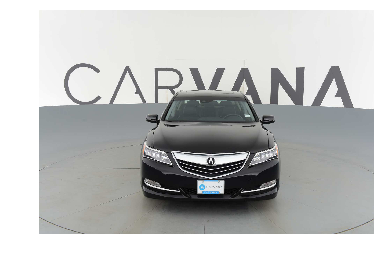

In [16]:
img_fn = image_fns[0]
img = open_image(img_fn)
img.show(figsize=(6,6))

In [20]:
def imgfn2maskfn(img_fn): return f'{path_masks/img_fn.stem}_mask.gif'

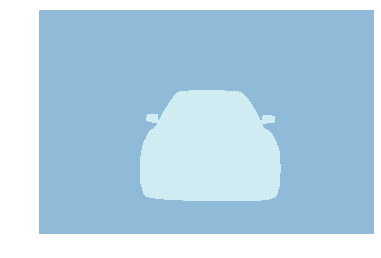

In [18]:
mask = open_mask(imgfn2maskfn(img_fn))
mask.show(figsize=(6,6))

## Create datasets of different sizes

In [19]:
img.size

torch.Size([1280, 1918])

The models we will train won't use the original data size. When creating the training batch, we could  always resize the original image but that can become a computational bottleneck and take longer than actually using the image to train the network. We can instead create the subsampled folders beforehand.

In [18]:
def resize_image(fn): open_image(fn).resize(sz).save(f'{resized_path}/{fn.name}')
def resize_mask(fn): open_mask(fn).resize(sz).save(f'{resized_path}/{fn.name}')

In [19]:
# img_sizes = (128, 256, 512, 1028)
# for sz in img_sizes:
#     resized_path = path/f'train_{sz}'; resized_path.mkdir(exist_ok=True, parents=True)
#     with ThreadPoolExecutor(8) as e: e.map(resize_image, image_fns)
#     resized_path = path/f'train_masks_{sz}'; resized_path.mkdir(exist_ok=True, parents=True)
#     with ThreadPoolExecutor(8) as e: e.map(resize_mask, mask_fns)

## Smaller dataset for testing things out

We will begin with a smaller dataset (of subsampled images) so that we can iterate faster in the beginning. Later we will use the full dataset for training and we will also use images of different sizes.

Let's use the fastai **data block API**. Remember the steps:
1. Specify the type of ItemList (ImageList, SegmentationItemList etc.)
2. How to read it
3. How to split it into train/val sets
4. How to get labels
5. Whether to use a test set (optional)
6. How to transform it (optional)
7. Create databunch

Note that you can chain all of these steps together and create the final databunch in a single python command (without the intermediate variables). But if you're working within a Jupyter environment (which I recommend!) creating the intermediate variables lets us explore the available methods and members of these objects.

E.g., to see the methods of an `item_list` you would type `item_list.` and pressing `tab` would give you suggenstions.

In [26]:
sz = 128
path_imgs = path/f'train_{sz}'
path_masks = path/f'train_masks_{sz}'
image_fns = get_image_files(path_imgs)

In [27]:
sample_size = 40*16
sample_func = lambda fn : fn in image_fns[:sample_size]
item_list = (SegmentationItemList.from_folder(path_imgs)
            .filter_by_func(sample_func))

In [28]:
split_idx = int(0.8 * sample_size); split_idx, split_idx % 16 == 0

(512, True)

In [29]:
item_lists = (item_list.split_by_idxs(train_idx=np.arange(split_idx),
                                     valid_idx=np.arange(split_idx, sample_size)))

We have to modify the default transforms a bit because for some images, part of the car would get shifted out of the image.

In [17]:
tfms = get_transforms(max_rotate=4, max_zoom=1.03, max_warp=0.02)

In [31]:
label_lists = (item_lists.label_from_func(imgfn2maskfn, classes=['background', 'car'])
              .transform(tfms, tfm_y=True))

In [32]:
bs=64
db = label_lists.databunch(bs=bs).normalize(imagenet_stats)

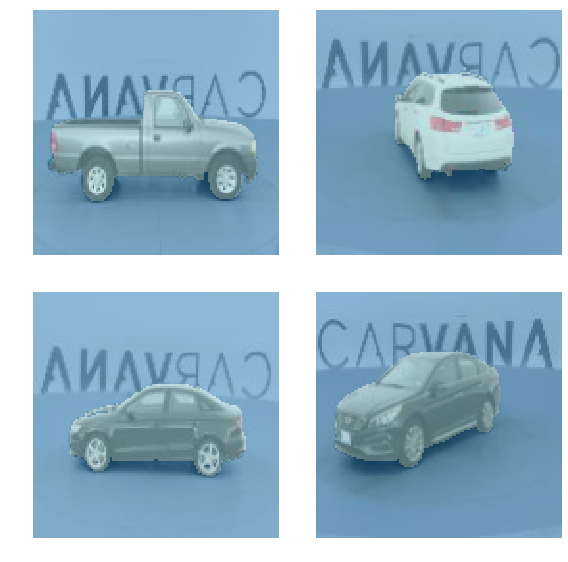

In [33]:
db.show_batch(2, figsize=(8,8))

In [34]:
db.c, db.classes

(2, ['background', 'car'])

### Model

In [21]:
def acc_carvana(input:Tensor, targs:Tensor)->Rank0Tensor:
    n = targs.shape[0]
    input = input.argmax(dim=1).view(n, -1)
    targs = targs.view(n, -1)
    return (input == targs).float().mean()

In [36]:
learn = unet_learner(db, models.resnet34, metrics=[acc_carvana, dice])

In [86]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


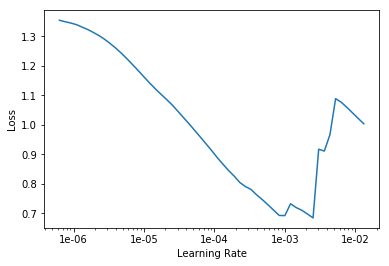

In [87]:
learn.recorder.plot()

In [60]:
lr = 5e-4

In [61]:
learn.fit_one_cycle(10, max_lr=slice(lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.834927,0.388355,0.858935,0.727030,00:10
1,0.546830,0.203533,0.908074,0.722565,00:04
2,0.419047,0.165883,0.926950,0.806405,00:05
3,0.321130,0.064473,0.974066,0.938529,00:04
4,0.251173,0.052729,0.978887,0.949737,00:04
5,0.202471,0.050029,0.979532,0.951770,00:05
6,0.167544,0.047308,0.980732,0.954664,00:05
7,0.141354,0.039092,0.984133,0.961987,00:04
8,0.121357,0.040347,0.983595,0.960972,00:04
9,0.105902,0.039376,0.983976,0.961781,00:04


In [62]:
learn.save('stage-1-rn34-subsampled')

In [63]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


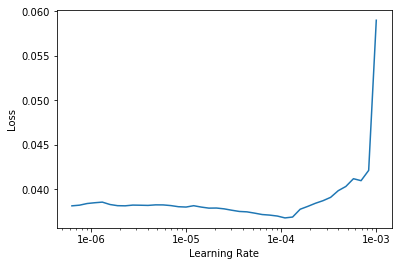

In [64]:
learn.lr_find(); learn.recorder.plot()

In [65]:
learn.fit_one_cycle(12, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.038150,0.039989,0.983688,0.961276,00:05
1,0.037344,0.034110,0.986074,0.966519,00:05
2,0.036033,0.036789,0.984652,0.963704,00:05
3,0.035387,0.030248,0.987510,0.969957,00:05
4,0.034034,0.030790,0.987281,0.969698,00:05
5,0.032616,0.026760,0.989057,0.973570,00:05
6,0.031207,0.026555,0.989069,0.973730,00:05
7,0.030016,0.024980,0.989794,0.975282,00:05
8,0.028917,0.024692,0.990038,0.975760,00:05
9,0.028007,0.024950,0.989785,0.975445,00:05


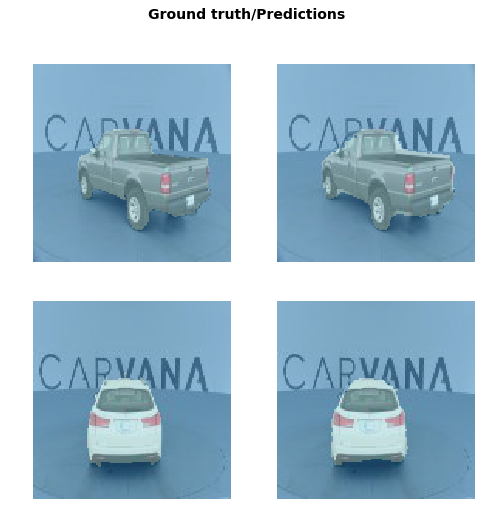

In [67]:
learn.show_results(rows=2)

# Training on full dataset

## 128x128

In [70]:
sz = 128
bs = 64
path_imgs = path/f'train_{sz}'
path_masks = path/f'train_masks_{sz}'
image_fns = get_image_files(path_imgs)

In [78]:
n_train = len(get_image_files(path_imgs))
split_idx = int(0.78 * n_train); split_idx, split_idx % 16 == 0

(3968, True)

In [89]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

In [91]:
learn = unet_learner(db, models.resnet34, metrics=[acc_carvana, dice])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


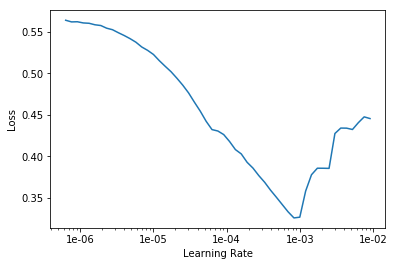

In [92]:
learn.lr_find(); learn.recorder.plot()

In [93]:
lr = 5e-4

In [94]:
learn.fit_one_cycle(12, max_lr=slice(lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.103566,0.042888,0.982754,0.958520,00:33
1,0.050227,0.029828,0.987863,0.971187,00:30
2,0.032373,0.024941,0.989855,0.975828,00:30
3,0.025398,0.018034,0.992661,0.982372,00:30
4,0.021044,0.016780,0.993109,0.983277,00:30
5,0.018928,0.015209,0.993786,0.984954,00:31
6,0.017492,0.014507,0.994083,0.985728,00:30
7,0.016313,0.013893,0.994324,0.986264,00:30
8,0.015519,0.013279,0.994560,0.986871,00:31
9,0.014972,0.013044,0.994660,0.987106,00:30


In [95]:
learn.save('rn34-128-stage1')

In [96]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


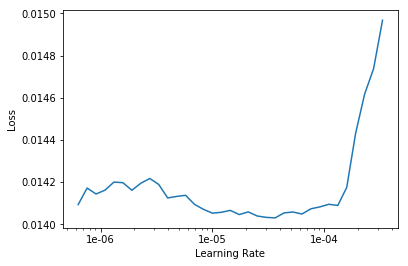

In [97]:
learn.lr_find();
learn.recorder.plot()

In [98]:
learn.fit_one_cycle(12, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.014128,0.012646,0.994832,0.987504,00:32
1,0.014257,0.012891,0.994738,0.987286,00:32
2,0.014448,0.013221,0.994580,0.986885,00:32
3,0.014370,0.012733,0.994821,0.987456,00:32
4,0.014207,0.012185,0.995026,0.988008,00:32
5,0.013864,0.012248,0.994990,0.987943,00:32
6,0.013538,0.012330,0.994953,0.987871,00:32
7,0.013277,0.011554,0.995305,0.988654,00:32
8,0.012997,0.011517,0.995330,0.988720,00:32
9,0.012732,0.011480,0.995348,0.988753,00:32


In [99]:
learn.save('rn34-128-stage2')

## 256x256

In [24]:
sz = 256
bs = 32
path_imgs = path/f'train_{sz}'
path_masks = path/f'train_masks_{sz}'
image_fns = get_image_files(path_imgs)
n_train = len(get_image_files(path_imgs))
split_idx = int(0.78 * n_train); split_idx, split_idx % 16 == 0

(3968, True)

In [25]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

In [26]:
learn = unet_learner(db, models.resnet34, metrics=[acc_carvana, dice])

In [27]:
model_path = path/'train_128/models/rn34-128-stage2'
learn.load(model_path);

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


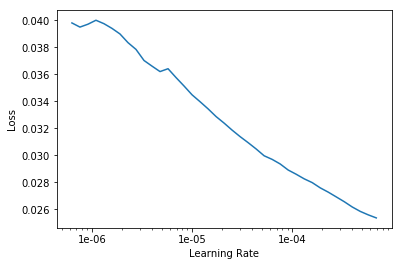

In [28]:
learn.lr_find(); learn.recorder.plot()

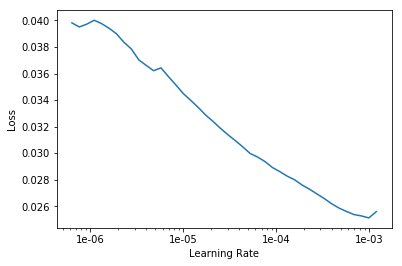

In [30]:
learn.recorder.plot(skip_end=2)

In [31]:
lr = 5e-4

In [32]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.013226,0.011317,0.995482,0.989233,02:06
1,0.011599,0.009446,0.996219,0.990959,02:06
2,0.450132,0.130611,0.949818,0.883049,02:05
3,0.061252,0.017554,0.993121,0.983667,02:05
4,0.018999,0.013198,0.994826,0.987660,02:05
5,0.013637,0.011554,0.995419,0.989049,02:05
6,0.012048,0.011000,0.995600,0.989507,02:05
7,0.011509,0.010247,0.995902,0.990204,02:05
8,0.011005,0.009966,0.996017,0.990473,02:05
9,0.010796,0.009923,0.996033,0.990518,02:05


In [33]:
learn.save('rn34-256-stage2')

## 512x512

In [24]:
sz = 512
bs = 8
path_imgs = path/f'train_{sz}'
path_masks = path/f'train_masks_{sz}'
image_fns = get_image_files(path_imgs)
n_train = len(get_image_files(path_imgs))
split_idx = int(0.78 * n_train); split_idx, split_idx % 16 == 0

(3968, True)

In [25]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

In [26]:
learn = unet_learner(db, models.resnet34, metrics=[acc_carvana, dice])

In [31]:
model_path = path/'train_256/models/rn34-256-stage2'
learn.load(model_path);

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


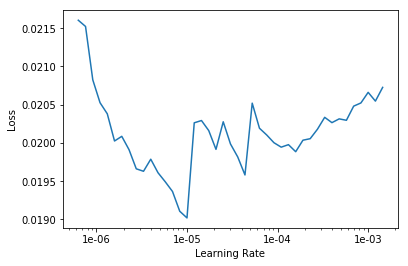

In [28]:
learn.lr_find(); learn.recorder.plot()

In [32]:
lr = 5e-6

In [33]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.012143,0.011546,0.995646,0.989691,08:16
1,0.010265,0.009869,0.996233,0.991058,08:15
2,0.009540,0.009293,0.996430,0.991521,08:15
3,0.009634,0.008930,0.996562,0.991838,08:15
4,0.009129,0.008947,0.996551,0.991810,08:15


In [34]:
learn.save('rn34-256-stage1')

In [35]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


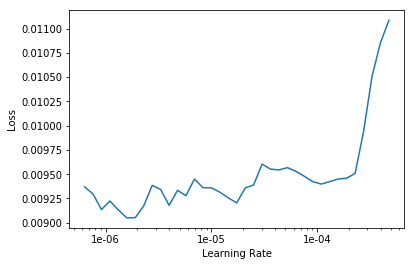

In [36]:
learn.lr_find(); learn.recorder.plot()

In [39]:
learn.load('rn34-512-stage1');

In [40]:
learn.fit_one_cycle(8, slice(1e-6, lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.009225,0.008882,0.996570,0.991857,08:31
1,0.008798,0.008472,0.996711,0.992188,08:31
2,0.008411,0.007955,0.996896,0.992617,08:31
3,0.008089,0.007664,0.997001,0.992861,08:31
4,0.007854,0.007475,0.997061,0.993003,08:32
5,0.007667,0.007364,0.997097,0.993087,08:31
6,0.007681,0.007366,0.997093,0.993078,08:31
7,0.007591,0.007314,0.997120,0.993139,08:31


In [41]:
learn.save('rn34-512-stage2');

## 1028x1028

In [18]:
sz = 1028
bs = 2
path_imgs = path/f'train_{sz}'
path_masks = path/f'train_masks_{sz}'
image_fns = get_image_files(path_imgs)
n_train = len(get_image_files(path_imgs))
split_idx = int(0.78 * n_train); split_idx, split_idx % 16 == 8

(3968, False)

In [21]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

In [46]:
learn = unet_learner(db, models.resnet34, metrics=[acc_carvana, dice])

In [40]:
model_path = path/'train_512/models/rn34-512-stage2'
learn.load(model_path);

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


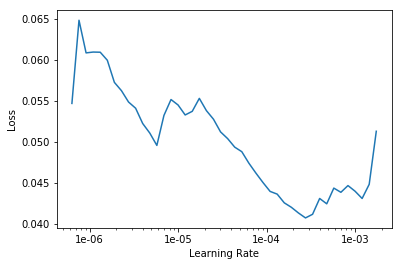

In [41]:
learn.lr_find(); learn.recorder.plot()

In [25]:
lr = 1e-4

In [43]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.007426,0.006783,0.997421,0.993871,40:11
1,0.005459,0.005217,0.997928,0.995058,40:15
2,0.005134,0.004996,0.998033,0.995277,40:17
3,0.004427,0.004134,0.998339,0.996026,40:18
4,0.004195,0.004029,0.998377,0.996119,40:18


In [44]:
learn.save('rn34-1028-stage1');

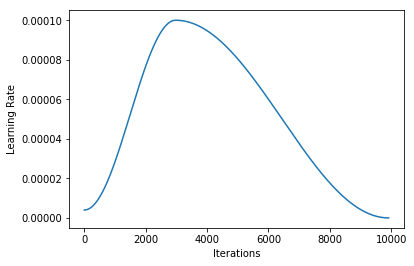

In [51]:
learn.recorder.plot_lr()

In [52]:
learn.recorder.lrs[:3], learn.recorder.lrs[-3:]

([4e-06, 4.00002674515339e-06, 4.00010698058375e-06],
 [4.460533296717021e-10, 4.2046814826565e-10, 4.0511703732592613e-10])

In [22]:
learn.load('rn34-1028-stage1');

In [24]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


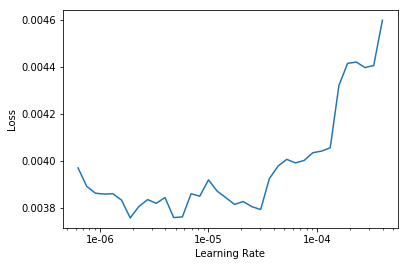

In [25]:
learn.lr_find(); learn.recorder.plot()

In [28]:
learn.fit_one_cycle(10, slice(5e-6, lr/5))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.004020,0.004008,0.998384,0.996133,41:26
1,0.004026,0.004033,0.998371,0.996104,41:25
2,0.004077,0.003994,0.998384,0.996137,41:25
3,0.004196,0.003906,0.998428,0.996243,41:25
4,0.003893,0.003801,0.998462,0.996319,41:25
5,0.003617,0.003690,0.998506,0.996422,41:26
6,0.003720,0.003732,0.998494,0.996394,41:26
7,0.003588,0.003643,0.998527,0.996473,41:26
8,0.003529,0.003607,0.998541,0.996505,41:27
9,0.003562,0.003620,0.998538,0.996496,41:27


In [30]:
learn.fit_one_cycle(3, slice(1e-5, lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.004040,0.004031,0.998380,0.996130,41:26
1,0.003712,0.003776,0.998485,0.996370,41:23
2,0.003605,0.003535,0.998566,0.996570,41:24


In [25]:
learn.fit_one_cycle(15, slice(1e-5, lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.003529,0.003627,0.998538,0.996503,40:29
1,0.003458,0.003651,0.998524,0.996467,40:21
2,0.003622,0.003922,0.998436,0.996249,40:21
3,0.003681,0.003637,0.998529,0.996476,40:22
4,0.003533,0.003771,0.998500,0.996404,40:23
5,0.003410,0.003573,0.998565,0.996565,40:24
6,0.003469,0.003603,0.998555,0.996540,40:25
7,0.003432,0.003469,0.998614,0.996681,40:25
8,0.003283,0.003491,0.998614,0.996677,40:24
9,0.003274,0.003435,0.998625,0.996706,40:26


### We're still improving, let's train longer!

In [27]:
learn.fit_one_cycle(18, slice(1e-5, lr))

epoch,train_loss,valid_loss,acc_carvana,dice,time
0,0.002914,0.003444,0.998654,0.996771,40:38
1,0.003017,0.003425,0.998652,0.996767,40:30
2,0.003088,0.003513,0.998648,0.996760,40:30
3,0.003121,0.003559,0.998605,0.996651,40:29
4,0.003495,0.003559,0.998594,0.996635,40:30
5,0.003210,0.003506,0.998623,0.996703,40:31
6,0.003201,0.003671,0.998599,0.996641,40:28
7,0.003187,0.003500,0.998629,0.996717,40:32
8,0.003010,0.003541,0.998615,0.996682,40:31
9,0.003024,0.003481,0.998636,0.996728,40:30


In [29]:
learn.save('rn34-1028-stage2');

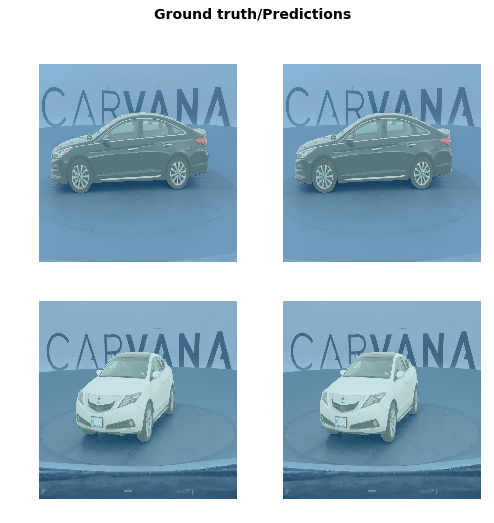

In [49]:
learn.show_results()

## Continue with train and validation data

In [36]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_none()
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

In [37]:
learn = unet_learner(db, models.resnet34, metrics=[acc_carvana, dice])
learn.load('rn34-1028-stage2');

In [38]:
learn.fit_one_cycle(12, slice(1e-5, lr))

In [39]:
learn.save('rn34-1028-stage2-train-valid');

In [41]:
df = pd.read_csv(path/'sample_submission.csv'); df.head()

,img,rle_mask
0,0004d4463b50_01.jpg,1 1
1,0004d4463b50_02.jpg,1 1
2,0004d4463b50_03.jpg,1 1
3,0004d4463b50_04.jpg,1 1
4,0004d4463b50_05.jpg,1 1


In [42]:
df = pd.read_csv(path/'train_masks.csv'); df.head()

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...


# Create submission file

img,rle_mask

0004d4463b50_01,1 1 5 1

0004d4463b50_02,1 1

0004d4463b50_03,1 1

etc.

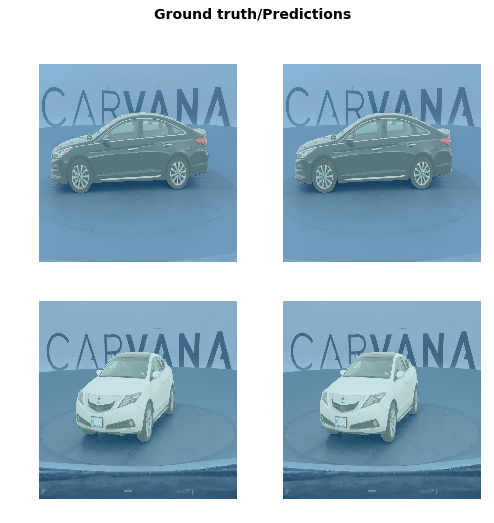

In [48]:
learn.show_results()

In [77]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

In [82]:
db.train_ds[0][1].data.max()

tensor(1)

(array([758150.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,      0., 298634.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

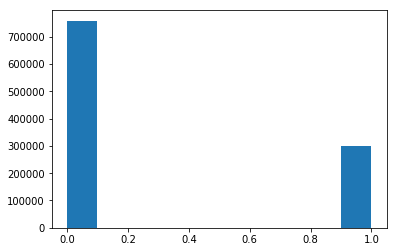

In [83]:
plt.hist(db.train_ds[0][1].data)

In [72]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .add_test_folder(path/'test')
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

Exception: It's not possible to apply those transforms to your dataset:
 Not implemented: you can't apply transforms to this type of item (EmptyLabel)

In [ ]:
# see https://forums.fast.ai/t/what-fake-label-for-segmentation-test-set/40696/3
https://forums.fast.ai/t/submitting-to-kaggle/34617/2

In [75]:
tfms[0]

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={'row_pct': 0.44407543266049254, 'col_pct': 0.04545095644485153, 'padding_mode': 'reflection'}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=False, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.02, 0.02)}, p=0.75, resolved={'magnitude': tensor([ 0.0026,  0.0137,  0.0112, -0.0158]), 'invert': False}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-4, 4)}, p=0.75, resolved={'degrees': -1.2968193472366822}, do_run=False, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.03), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={'scale': 1.0129821031774535, 'row_pct': 0.49098394815923985, 'col_pct': 0.7560130468428278}, do_run

In [76]:
tfms[1]

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={'padding_mode': 'reflection', 'row_pct': 0.5, 'col_pct': 0.5}, do_run=True, is_random=True, use_on_y=True)]

In [71]:
db

ImageDataBunch;

Train: LabelList (3968 items)
x: SegmentationItemList
Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028)
y: SegmentationLabelList
ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028)
Path: /home/jupyter/.fastai/data/carvana/train_1028;

Valid: LabelList (1120 items)
x: SegmentationItemList
Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028)
y: SegmentationLabelList
ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028)
Path: /home/jupyter/.fastai/data/carvana/train_1028;

Test: LabelList (0 items)
x: SegmentationItemList

y: EmptyLabelList

Path: /home/jupyter/.fastai/data/carvana/train_1028

In [63]:
db.add_test(path/'test')

TypeError: object of type 'PosixPath' has no len()

In [66]:
d = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car']))

In [69]:
doc(d.add_test_folder)

add_test_folder [source] [test] add_test_folder ( test_folder : str = 'test' , label : Any = None ) 
 
 × No tests found for add_test_folder . To contribute a test please refer to this guide and this discussion . Add test set containing items from test_folder and an arbitrary label . 
 Show in docs

In [22]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car'])
      .transform(tfms, tfm_y=True)
      .databunch(bs=bs).normalize(imagenet_stats))

In [23]:
db

ImageDataBunch;

Train: LabelList (3968 items)
x: SegmentationItemList
Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028)
y: SegmentationLabelList
ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028)
Path: /home/jupyter/.fastai/data/carvana/train_1028;

Valid: LabelList (1120 items)
x: SegmentationItemList
Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028),Image (3, 1028, 1028)
y: SegmentationLabelList
ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028),ImageSegment (1, 1028, 1028)
Path: /home/jupyter/.fastai/data/carvana/train_1028;

Test: None

In [24]:
db = (SegmentationItemList.from_folder(path_imgs)
      .split_by_idx(np.arange(split_idx, n_train))
      .label_from_func(imgfn2maskfn, classes=['background', 'car']))